PROBLEM STATEMENT: 

    estimate "Estimated Shares Outstanding"

By: Prem S Rajanampalle, REI Intercollege, Dayalbagh, Agra

The dataset link: https://www.kaggle.com/datasets/dgawlik/nyse

In [19]:
import zipfile
zip_ref = zipfile.ZipFile("fundamentals.csv.zip")
zip_ref.extractall()
zip_ref.close()

In [20]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [21]:
ds = pd.read_csv("fundamentals.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

I think "estimated shares outstanding" is the target variable

In [22]:
ds.head(10)

Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   
5           5           AAP    2013-12-28      2.609239e+09   
6           6           AAP    2015-01-03      3.616038e+09   
7           7           AAP    2016-01-02      3.757085e+09   
8           8          AAPL    2013-09-28      3.622300e+10   
9           9          AAPL    2014-09-27      4.864900e+10   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0        -2.220000e+08               -1.961000e+09           23.0   
1        -9.300000e+07               -2.723000e+09           67.0   
2        -1.600000e+08               -1.500000e+08          143.0   
3         3.520000e+08               -7.080000e+08          135.0   
4        -8.948200e+07                6.000000e+05           32.0   
5        -3.242800e+07                2.698000e+06           26.0   
6        -4.820900e+07                3.092000e+06           25.0   
7        -2.147600e+07               -7.484000e+06           19.0   
8        -1.949000e+09                1.156000e+09           30.0   
9        -6.452000e+09                9.800000e+08           35.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0         -1.888000e+09     4.695000e+09        53.0  ...   
1         -3.114000e+09     1.059200e+10        75.0  ...   
2         -5.311000e+09     1.513500e+10        60.0  ...   
3         -6.151000e+09     1.159100e+10        51.0  ...   
4         -2.711820e+08     5.202150e+08        23.0  ...   
5         -1.957570e+08     5.312930e+08        40.0  ...   
6         -2.284460e+08     5.629450e+08         3.0  ...   
7         -2.347470e+08     6.033320e+08         2.0  ...   
8         -8.165000e+09     0.000000e+00        93.0  ...   
9         -9.571000e+09     0.000000e+00        40.0  ...   

   Total Current Assets  Total Current Liabilities  Total Equity  \
0          7.072000e+09               9.011000e+09 -7.987000e+09   
1          1.432300e+10               1.380600e+10 -2.731000e+09   
2          1.175000e+10               1.340400e+10  2.021000e+09   
3          9.985000e+09               1.360500e+10  5.635000e+09   
4          3.184200e+09               2.559638e+09  1.210694e+09   
5          3.989384e+09               2.764785e+09  1.516205e+09   
6          4.741040e+09               3.654416e+09  2.002912e+09   
7          4.940746e+09               3.797477e+09  2.460648e+09   
8          7.328600e+10               4.365800e+10  1.235490e+11   
9          6.853100e+10               6.344800e+10  1.115470e+11   

   Total Liabilities  Total Liabilities & Equity  Total Revenue  \
0       2.489100e+10                1.690400e+10   2.485500e+10   
1       4.500900e+10                4.227800e+10   2.674300e+10   
2       4.120400e+10                4.322500e+10   4.265000e+10   
3       4.278000e+10                4.841500e+10   4.099000e+10   
4       3.403120e+09                4.613814e+09   6.205003e+09   
5       4.048569e+09                5.564774e+09   6.493814e+09   
6       5.959446e+09                7.962358e+09   9.843861e+09   
7       5.673917e+09                8.134565e+09   9.737018e+09   
8       8.345100e+10                2.070000e+11   1.709100e+11   
9       1.202920e+11                2.318390e+11   1.827950e+11   

   Treasury Stock  For Year  Earnings Per Share  Estimated Shares Outstanding  
0    -367000000.0    2012.0               -5.60                  3.350000e+08  
1             0.0    2013.0              -11.25                  1.630222e+08  
2             0.0    2014.0                4.02                  7.169154e+08  
3             0.0    2015.0               11.39                  6.681

Things we need to do:

    1. Check ticker symbol 
    2. Change period ending to datatime object
    3. Set unnamed 0 to index
    4. Check for null values
    5. Heatmap

In [23]:
ds['Ticker Symbol'].value_counts()

AAL     4
NOV     4
OMC     4
OKE     4
O       4
       ..
PYPL    3
WRK     3
AVGO    2
MYL     2
CSRA    2
Name: Ticker Symbol, Length: 448, dtype: int64

We are going to need to drop this column

In [24]:
# 1. Dropping ticker symbol
ds = ds.drop('Ticker Symbol', axis = 1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                           1482 non-null  

In [25]:
# 2. Change date to datetime
ds['Period Ending'] = pd.to_datetime(ds['Period Ending'])

In [26]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Unnamed: 0                                           1781 non-null   int64         
 1   Period Ending                                        1781 non-null   datetime64[ns]
 2   Accounts Payable                                     1781 non-null   float64       
 3   Accounts Receivable                                  1781 non-null   float64       
 4   Add'l income/expense items                           1781 non-null   float64       
 5   After Tax ROE                                        1781 non-null   float64       
 6   Capital Expenditures                                 1781 non-null   float64       
 7   Capital Surplus                                      1781 non-null   float64       
 8 

In [27]:
ds.set_index('Period Ending', inplace = True)

In [28]:
ds.head()

Unnamed: 0  Accounts Payable  Accounts Receivable  \
Period Ending                                                      
2012-12-31              0      3.068000e+09         -222000000.0   
2013-12-31              1      4.975000e+09          -93000000.0   
2014-12-31              2      4.668000e+09         -160000000.0   
2015-12-31              3      5.102000e+09          352000000.0   
2012-12-29              4      2.409453e+09          -89482000.0   

               Add'l income/expense items  After Tax ROE  \
Period Ending                                              
2012-12-31                  -1.961000e+09           23.0   
2013-12-31                  -2.723000e+09           67.0   
2014-12-31                  -1.500000e+08          143.0   
2015-12-31                  -7.080000e+08          135.0   
2012-12-29                   6.000000e+05           32.0   

               Capital Expenditures  Capital Surplus  Cash Ratio  \
Period Ending                                                      
2012-12-31            -1.888000e+09     4.695000e+09        53.0   
2013-12-31            -3.114000e+09     1.059200e+10        75.0   
2014-12-31            -5.311000e+09     1.513500e+10        60.0   
2015-12-31            -6.151000e+09     1.159100e+10        51.0   
2012-12-29            -2.711820e+08     5.202150e+08        23.0   

               Cash and Cash Equivalents  Changes in Inventories  ...  \
Period Ending                                                     ...   
2012-12-31                  1.330000e+09                     0.0  ...   
2013-12-31                  2.175000e+09                     0.0  ...   
2014-12-31                  1.768000e+09                     0.0  ...   
2015-12-31                  1.085000e+09                     0.0  ...   
2012-12-29                  5.981110e+08            -260298000.0  ...   

               Total Current Assets  Total Current Liabilities  Total Equity  \
Period Ending                                                                  
2012-12-31             7.072000e+09               9.011000e+09 -7.987000e+09   
2013-12-31             1.432300e+10               1.380600e+10 -2.731000e+09   
2014-12-31             1.175000e+10               1.340400e+10  2.021000e+09   
2015-12-31             9.985000e+09               1.360500e+10  5.635000e+09   
2012-12-29             3.184200e+09               2.559638e+09  1.210694e+09   

               Total Liabilities  Total Liabilities & Equity  Total Revenue  \
Period Ending                                                                 
2012-12-31          2.489100e+10                1.690400e+10   2.485500e+10   
2013-12-31          4.500900e+10                4.227800e+10   2.674300e+10   
2014-12-31          4.120400e+10                4.322500e+10   4.265000e+10   
2015-12-31          4.278000e+10                4.841500e+10   4.099000e+10   
2012-12-29          3.403120e+09                4.613814e+09   6.205003e+09   

               Treasury Stock  For Year  Earnings Per Share  \
Period Ending                                                 
2012-12-31       -367000000.0    2012.0               -5.60   
2013-12-31                0.0    2013.0              -11.25   
2014-12-31                0.0    2014.0                4.02   
2015-12-31                0.0    2015.0               11.39   
2012-12-29        -27095000.0    2012.0                5.29   

               Estimated Shares Outstanding  
Period Ending                                
2012-12-31                     3.350000e+08  
2013-12-31                     1.630222e+08  
2014-12-31                     7.169154e+08  
2015-12-31                     6.681299e+08  
2012-12-29                     7.328355e+07  

[5 rows x 77 columns]

In [29]:
ds = ds.drop('Unnamed: 0', axis = 1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1781 entries, 2012-12-31 to 2016-12-31
Data columns (total 76 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     1781 non-null   float64
 1   Accounts Receivable                                  1781 non-null   float64
 2   Add'l income/expense items                           1781 non-null   float64
 3   After Tax ROE                                        1781 non-null   float64
 4   Capital Expenditures                                 1781 non-null   float64
 5   Capital Surplus                                      1781 non-null   float64
 6   Cash Ratio                                           1482 non-null   float64
 7   Cash and Cash Equivalents                            1781 non-null   float64
 8   Changes in Inventories                            

In [30]:
# Checking for null values...
ds.isnull().sum()

Accounts Payable                  0
Accounts Receivable               0
Add'l income/expense items        0
After Tax ROE                     0
Capital Expenditures              0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 76, dtype: int64

Our target variable is estimated shares outstanding... and there are 219 null values... what we are going to do is that
we are going to remove or drop the rows with null values... That's the best thing to do

In [31]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1781 entries, 2012-12-31 to 2016-12-31
Data columns (total 76 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     1781 non-null   float64
 1   Accounts Receivable                                  1781 non-null   float64
 2   Add'l income/expense items                           1781 non-null   float64
 3   After Tax ROE                                        1781 non-null   float64
 4   Capital Expenditures                                 1781 non-null   float64
 5   Capital Surplus                                      1781 non-null   float64
 6   Cash Ratio                                           1482 non-null   float64
 7   Cash and Cash Equivalents                            1781 non-null   float64
 8   Changes in Inventories                            

In [32]:
ds = ds.dropna()

In [33]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1299 entries, 2012-12-31 to 2015-12-31
Data columns (total 76 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     1299 non-null   float64
 1   Accounts Receivable                                  1299 non-null   float64
 2   Add'l income/expense items                           1299 non-null   float64
 3   After Tax ROE                                        1299 non-null   float64
 4   Capital Expenditures                                 1299 non-null   float64
 5   Capital Surplus                                      1299 non-null   float64
 6   Cash Ratio                                           1299 non-null   float64
 7   Cash and Cash Equivalents                            1299 non-null   float64
 8   Changes in Inventories                            

Wow!!!! 

    - Owen Wilson

### EDA

array([[<Axes: title={'center': 'Accounts Payable'}>,
        <Axes: title={'center': 'Accounts Receivable'}>,
        <Axes: title={'center': "Add'l income/expense items"}>,
        <Axes: title={'center': 'After Tax ROE'}>,
        <Axes: title={'center': 'Capital Expenditures'}>,
        <Axes: title={'center': 'Capital Surplus'}>,
        <Axes: title={'center': 'Cash Ratio'}>,
        <Axes: title={'center': 'Cash and Cash Equivalents'}>,
        <Axes: title={'center': 'Changes in Inventories'}>],
       [<Axes: title={'center': 'Common Stocks'}>,
        <Axes: title={'center': 'Cost of Revenue'}>,
        <Axes: title={'center': 'Current Ratio'}>,
        <Axes: title={'center': 'Deferred Asset Charges'}>,
        <Axes: title={'center': 'Deferred Liability Charges'}>,
        <Axes: title={'center': 'Depreciation'}>,
        <Axes: title={'center': 'Earnings Before Interest and Tax'}>,
        <Axes: title={'center': 'Earnings Before Tax'}>,
        <Axes: title={'center': 'Ef

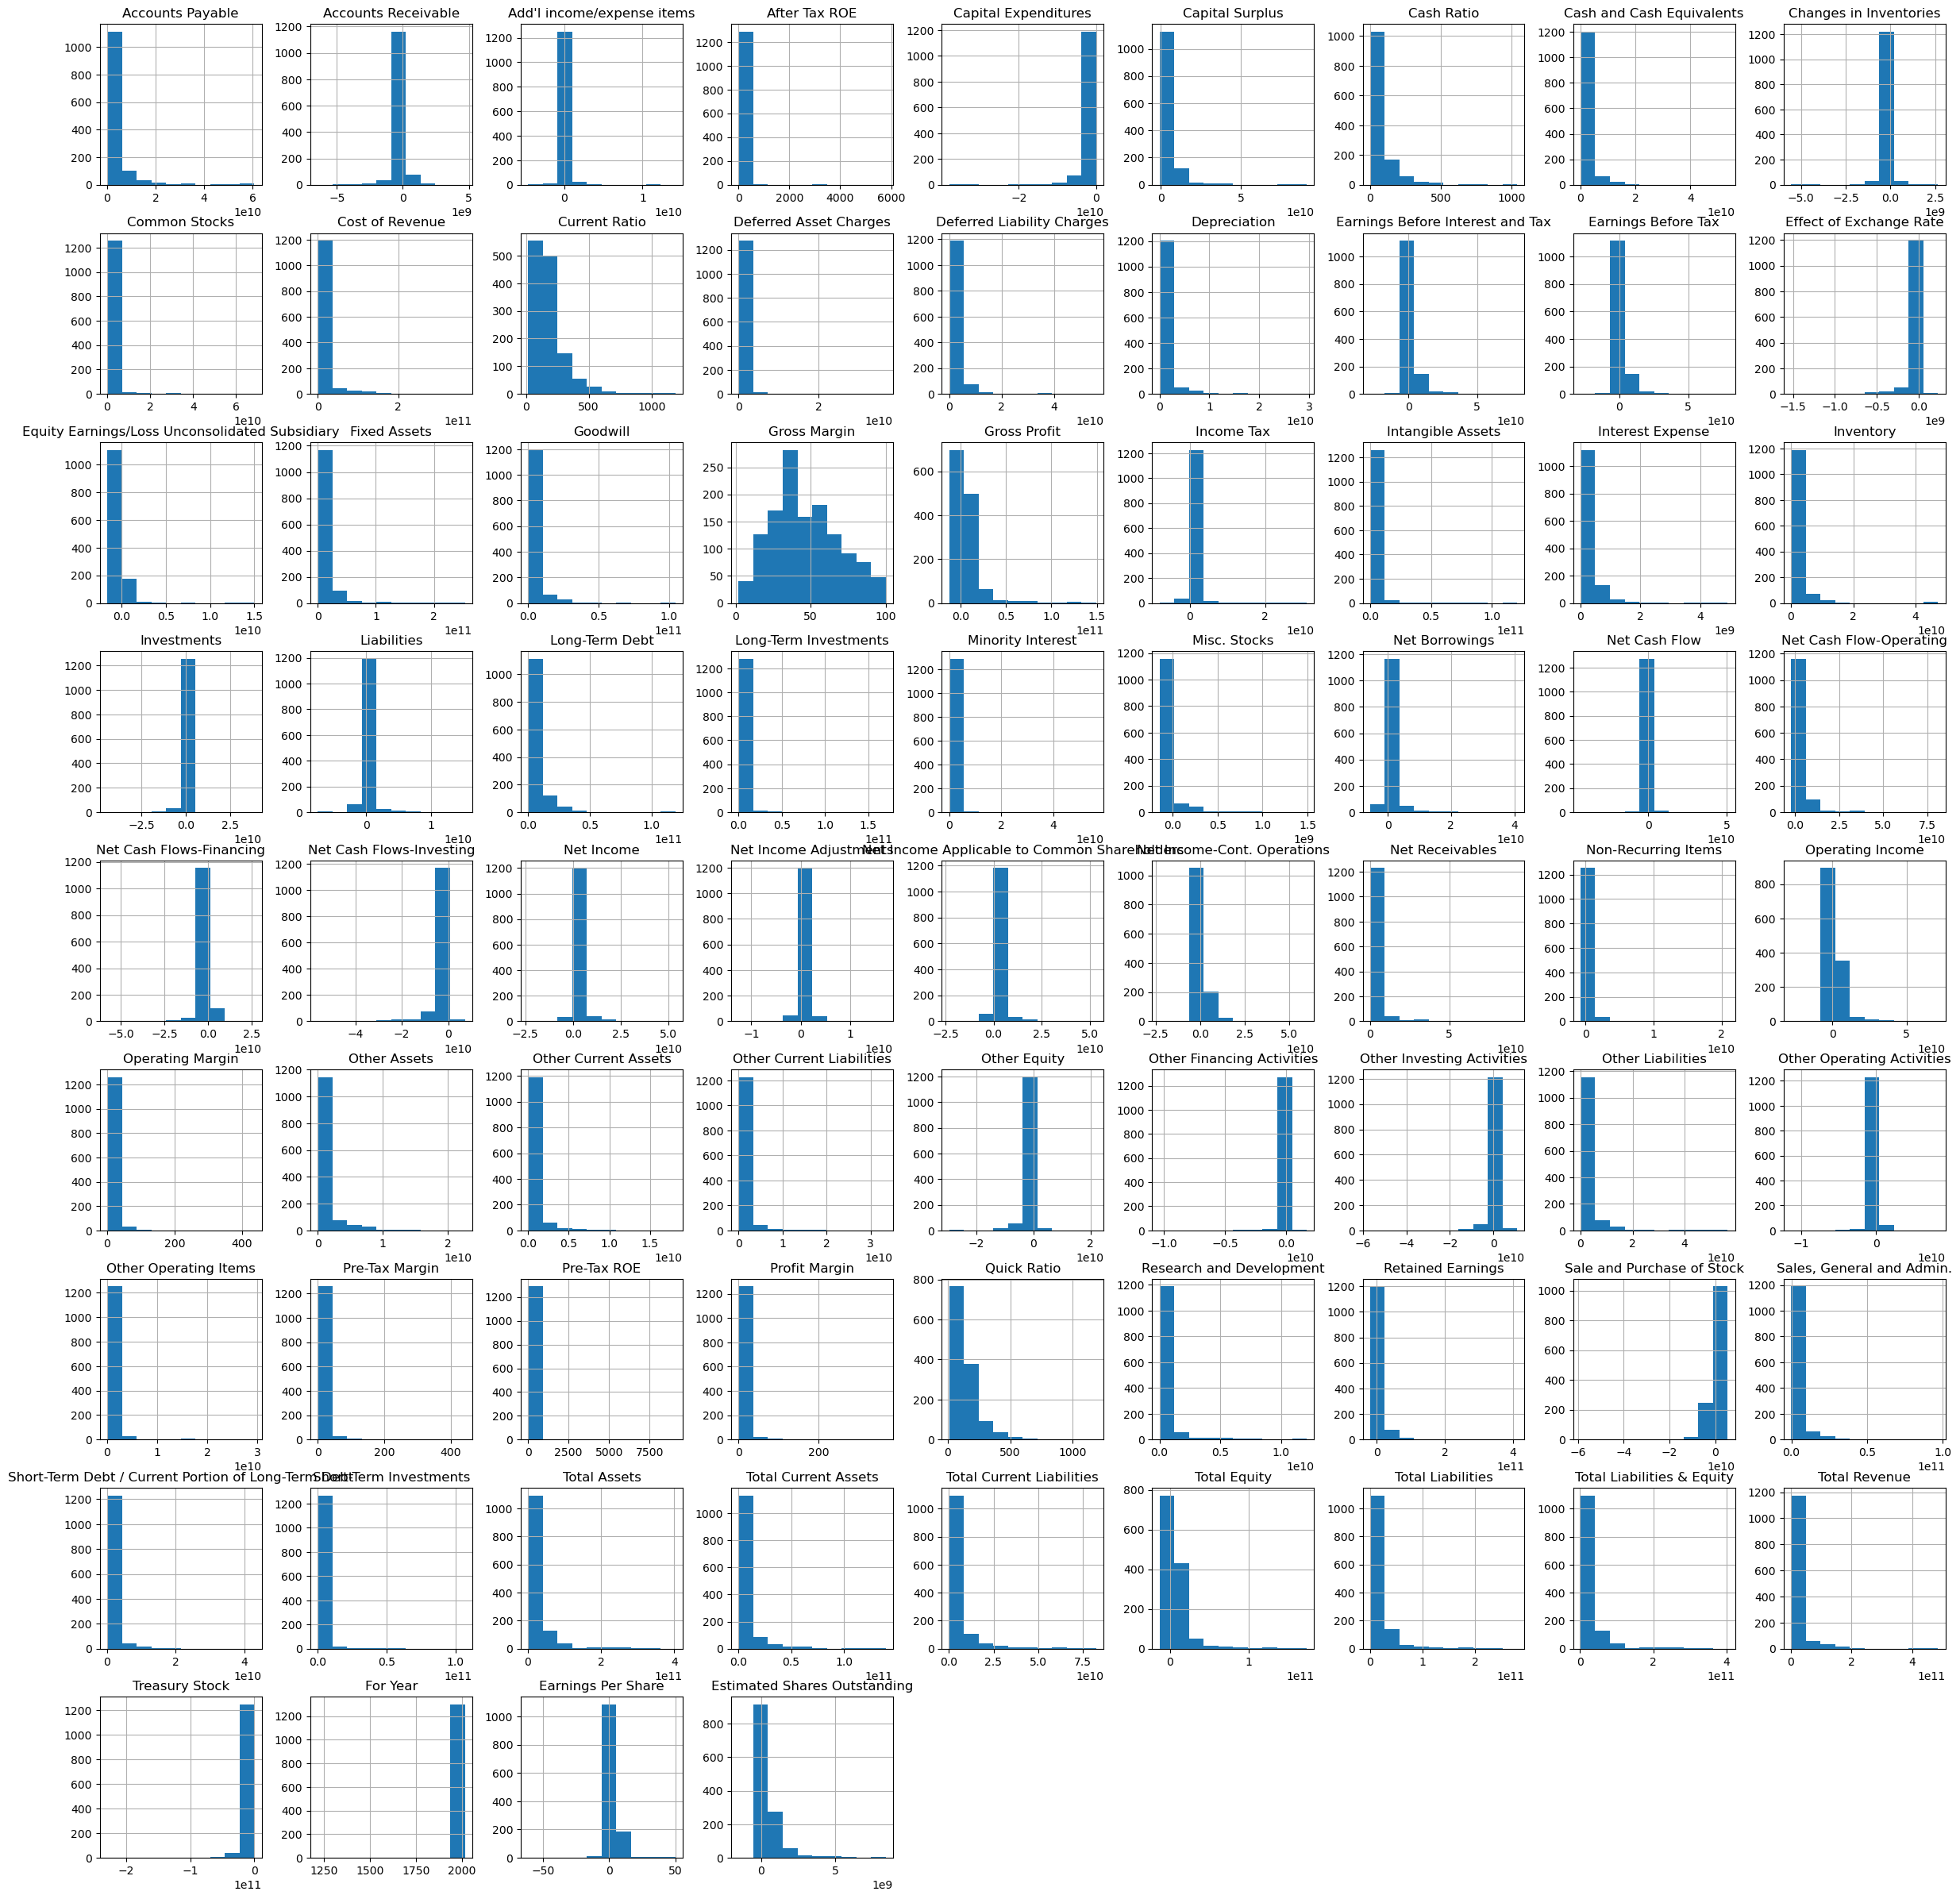

In [35]:
ds.hist(figsize = (30, 30))

In [37]:
plt.figure(figsize = (30, 30))
ds.corr()

Accounts Payable  Accounts Receivable  \
Accounts Payable                      1.000000            -0.203818   
Accounts Receivable                  -0.203818             1.000000   
Add'l income/expense items            0.310313            -0.016543   
After Tax ROE                        -0.025123             0.015093   
Capital Expenditures                 -0.618239             0.047639   
...                                        ...                  ...   
Total Revenue                         0.884285            -0.142501   
Treasury Stock                       -0.442801            -0.118040   
For Year                             -0.011775             0.022187   
Earnings Per Share                    0.141707            -0.093006   
Estimated Shares Outstanding          0.518993            -0.174724   

                              Add'l income/expense items  After Tax ROE  \
Accounts Payable                                0.310313      -0.025123   
Accounts Receivable                            -0.016543       0.015093   
Add'l income/expense items                      1.000000      -0.013123   
After Tax ROE                                  -0.013123       1.000000   
Capital Expenditures                           -0.395192       0.025168   
...                                                  ...            ...   
Total Revenue                                   0.319760      -0.026600   
Treasury Stock                                 -0.366070       0.005244   
For Year                                        0.003534       0.002999   
Earnings Per Share                              0.097412      -0.043057   
Estimated Shares Outstanding                    0.182738      -0.030411   

                              Capital Expenditures  Capital Surplus  \
Accounts Payable                         -0.618239         0.273143   
Accounts Receivable                       0.047639        -0.071437   
Add'l income/expense items               -0.395192         0.049078   
After Tax ROE                             0.025168        -0.018456   
Capital Expenditures                      1.000000        -0.337971   
...                                            ...              ...   
Total Revenue                            -0.660087         0.221914   
Treasury Stock                            0.497833        -0.196009   
For Year                                 -0.009117         0.007712   
Earnings Per Share                       -0.022182        -0.083429   
Estimated Shares Outstanding             -0.487570         0.505130   

                              Cash Ratio  Cash and Cash Equivalents  \
Accounts Payable               -0.126720                   0.665078   
Accounts Receivable            -0.015310                  -0.191034   
Add'l income/expense items      0.021470                   0.204048   
After Tax ROE                   0.020884                  -0.015748   
Capital Expenditures            0.112247                  -0.454440   
...                                  ...                        ...   
Total Revenue                  -0.120667                   0.525032   
Treasury Stock                  0.065004                  -0.254218   
For Year                        0.018620                   0.005118   
Earnings Per Share              0.025549                   0.089345   
Estimated Shares Outstanding    0.087224                   0.519088   

                              Changes in Inventories  Common Stocks  ...  \
Accounts Payable                           -0.364830       0.278696  ...   
Accounts Receivable                         0.186528      -0.125804  ...   
Add'l income/expense items                 -0.079553       0.118956  ...   
After Tax ROE                               0.016638      -0.014609  ...   
Capital Expenditures                        0.121384      -0.207864  ...   
...                                              ...            ...  ...   
Total Revenue                         

<Figure size 3000x3000 with 0 Axes>

<Axes: >

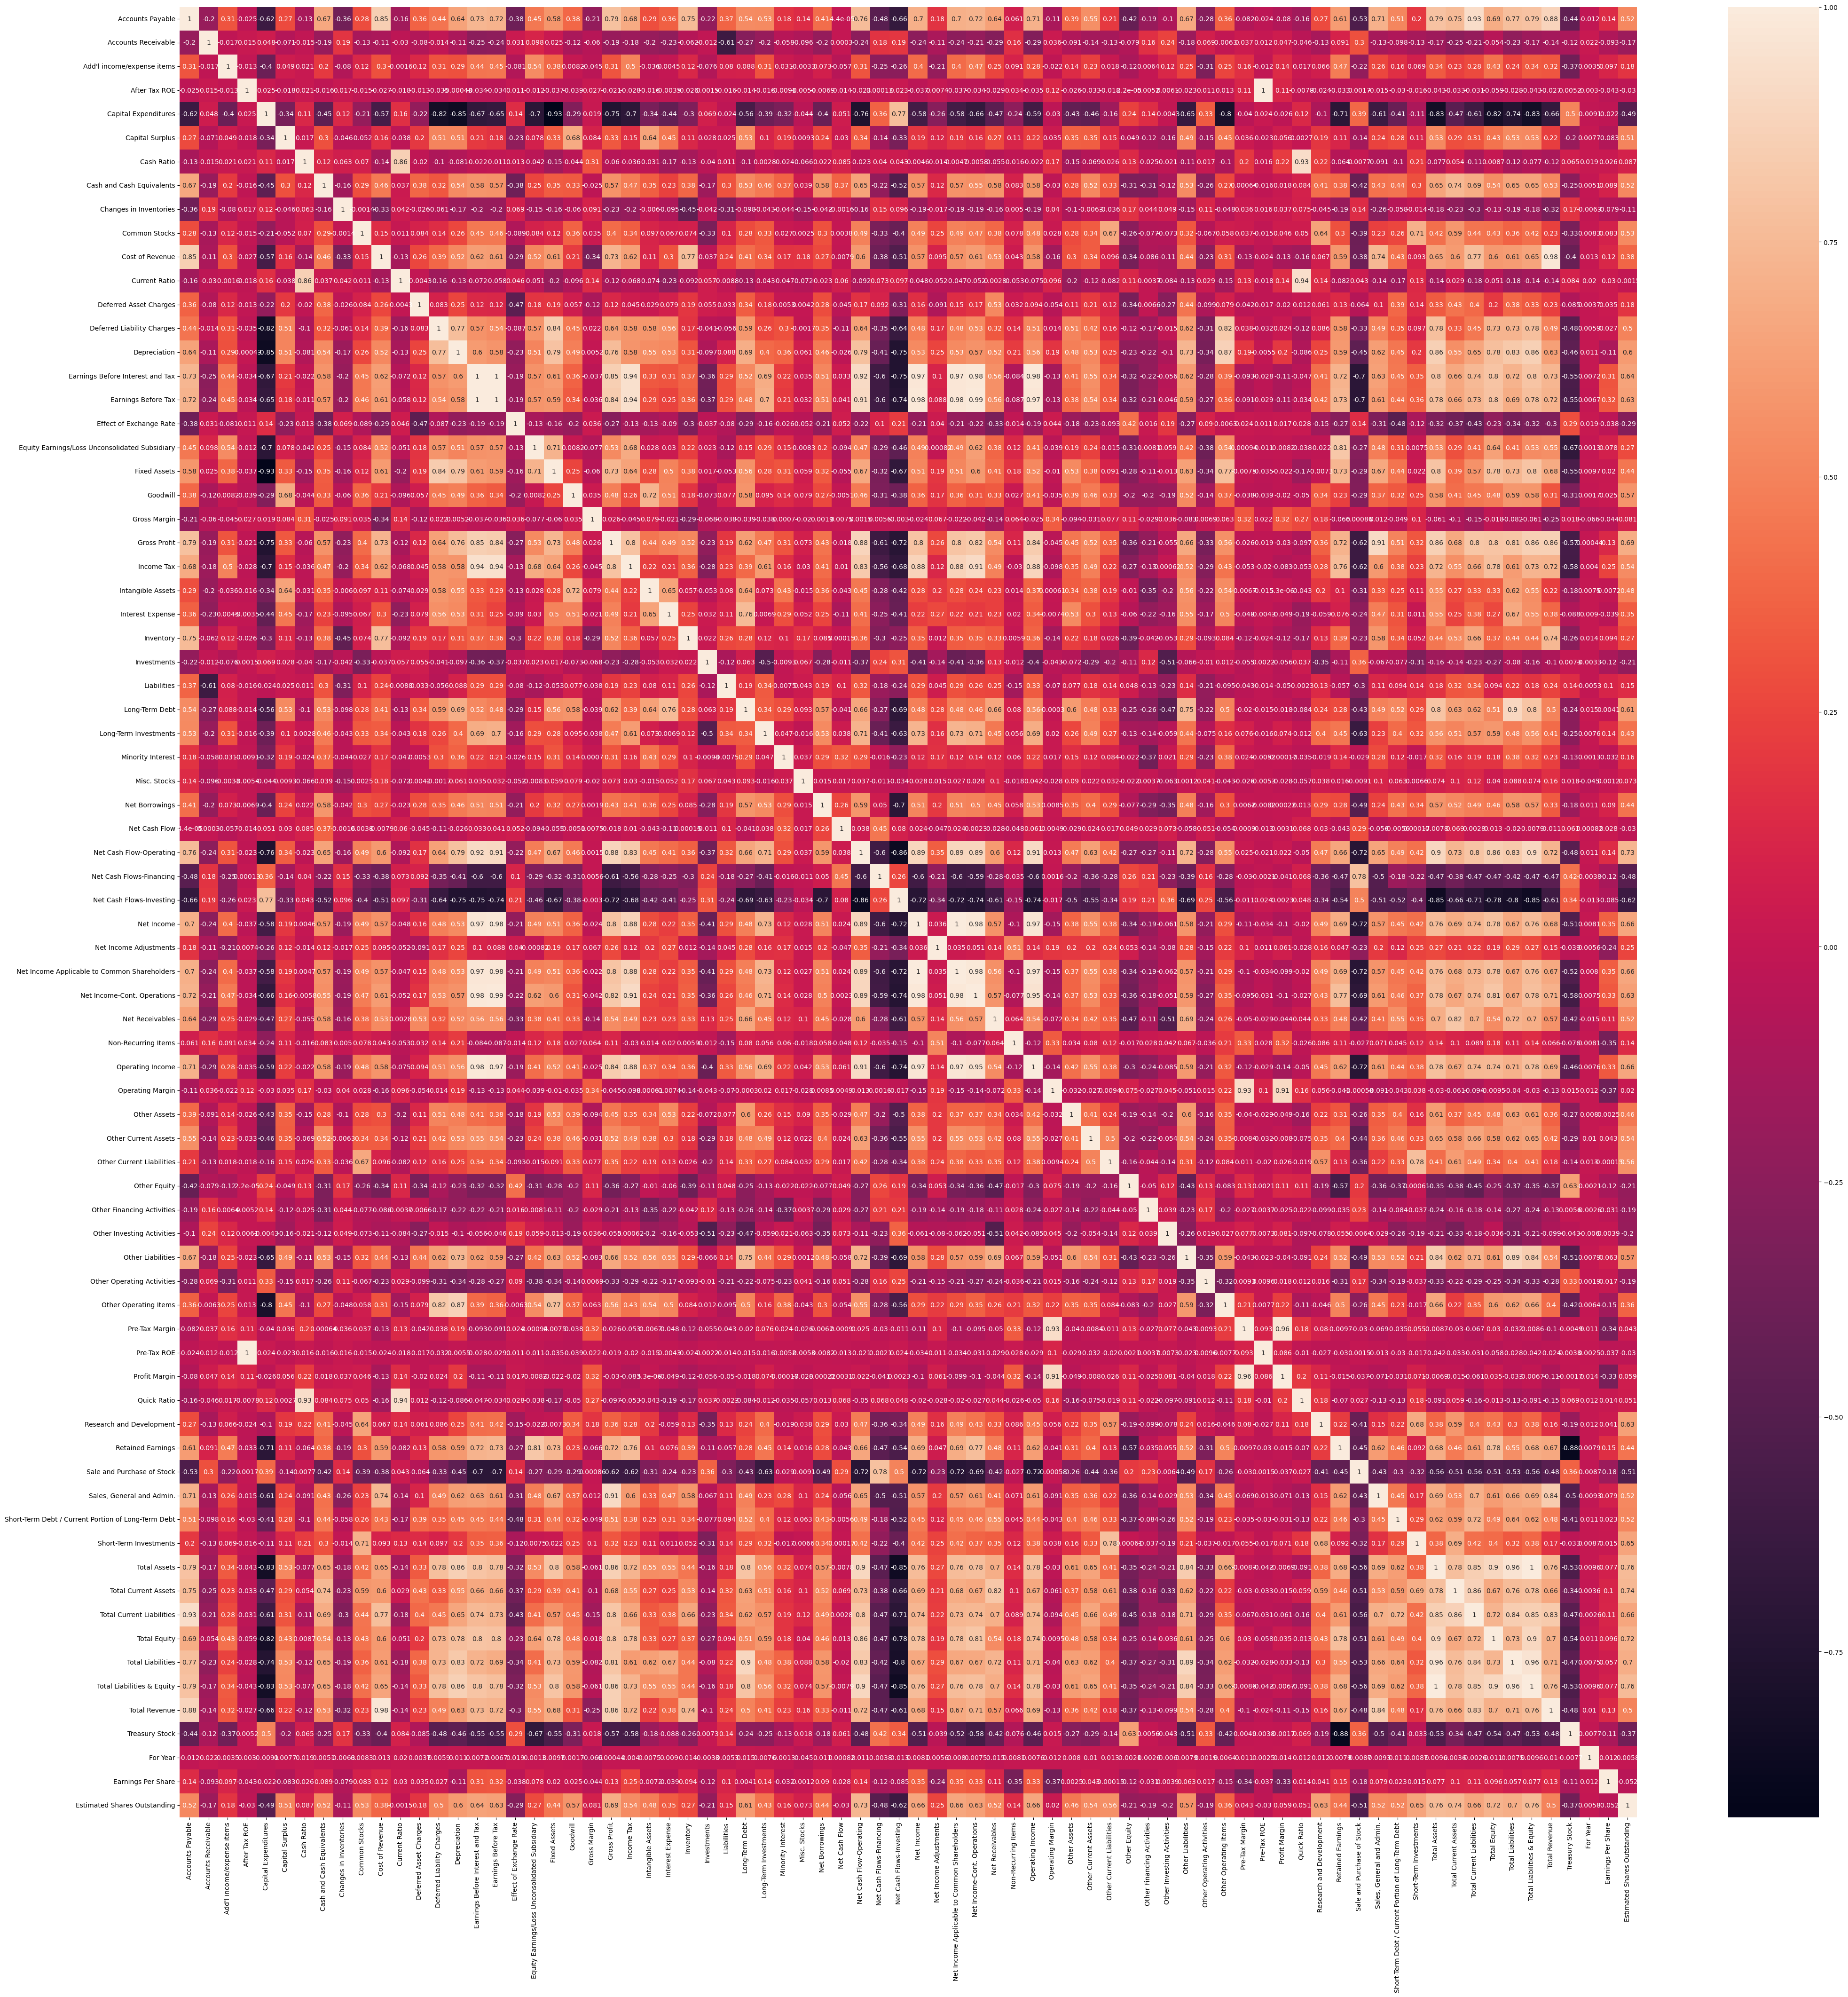

In [40]:
plt.figure(figsize = (50, 50))
sb.heatmap(ds.corr(), annot = True)

### Splitting 

In [44]:
X = ds.iloc[:, 0:-1]
y = ds.iloc[:, -1]

In [63]:
features = list(X.columns)

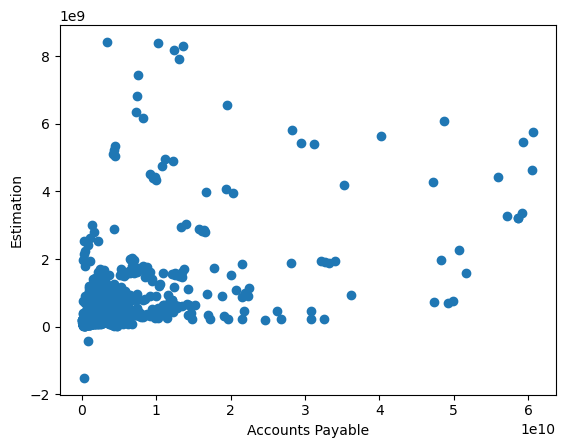

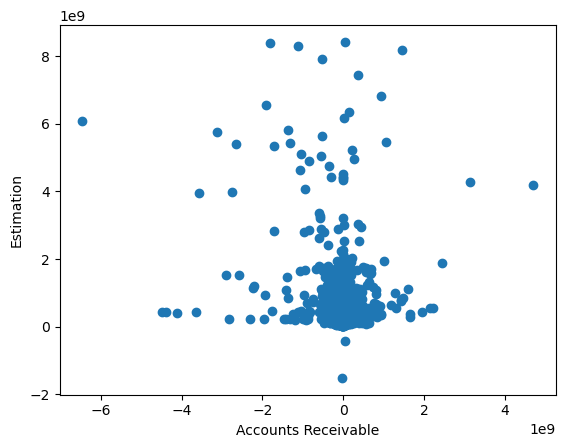

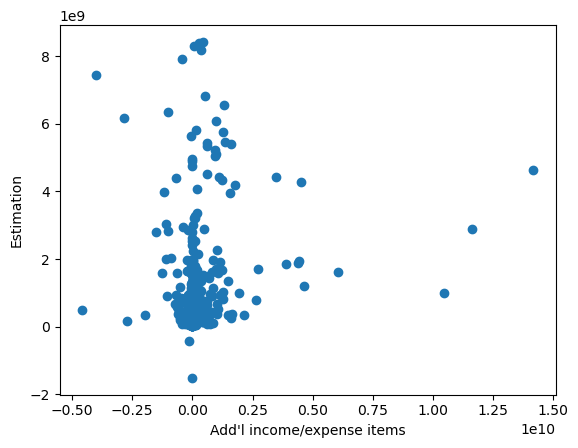

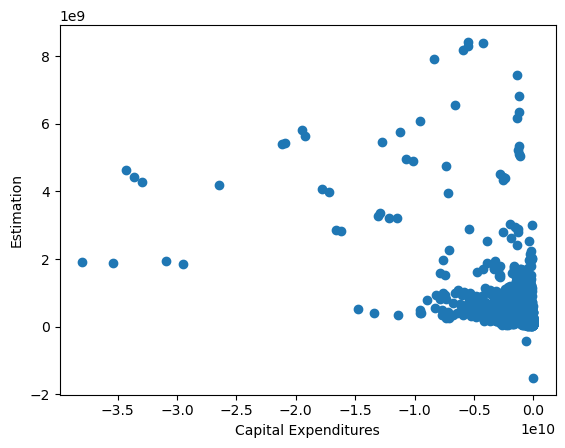

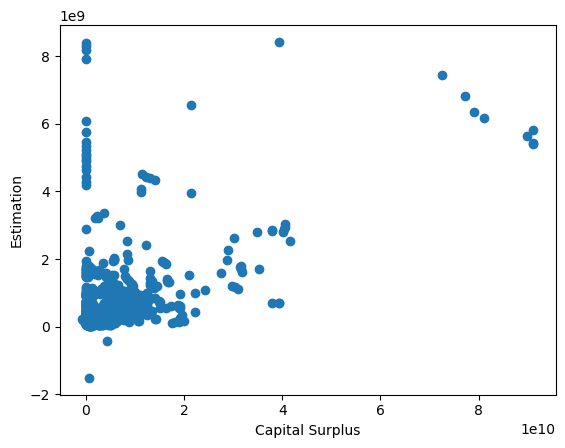

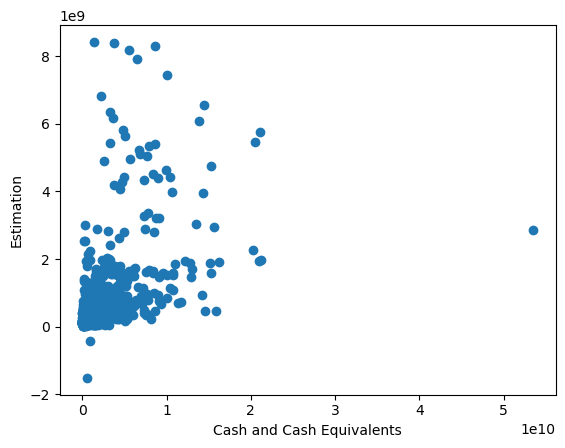

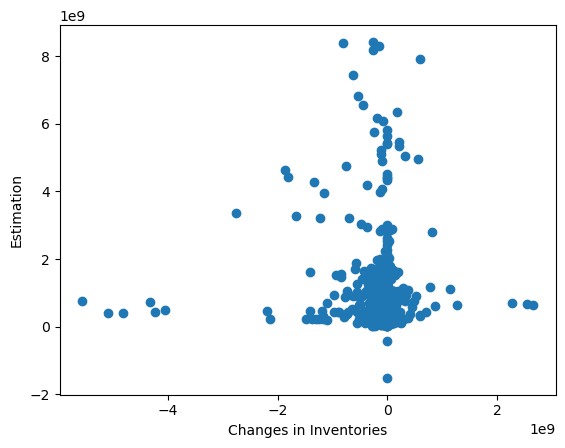

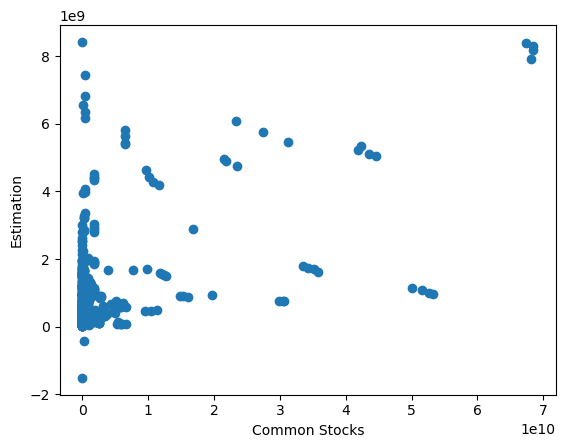

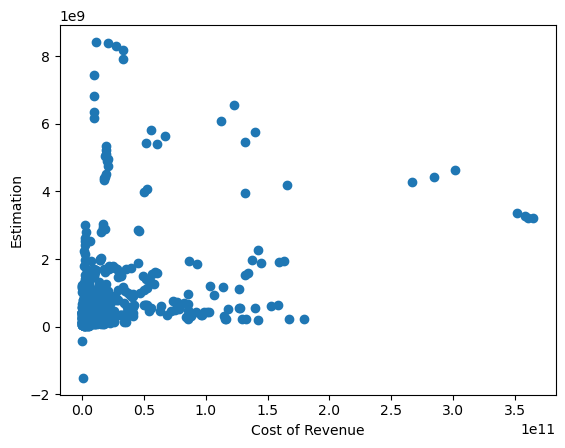

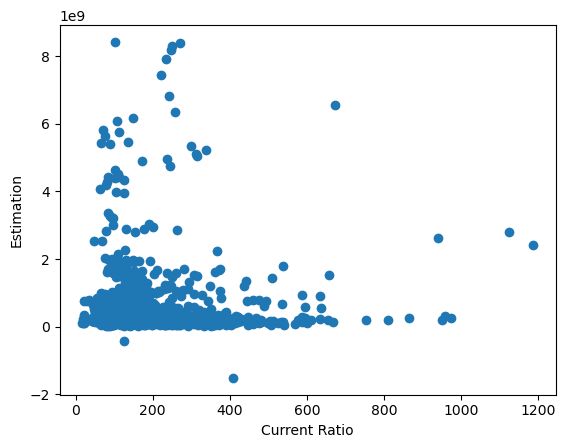

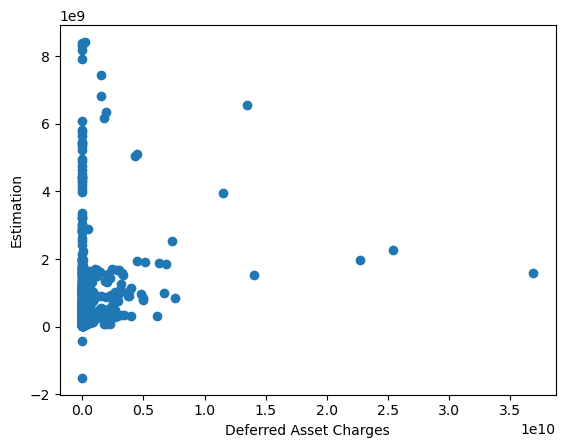

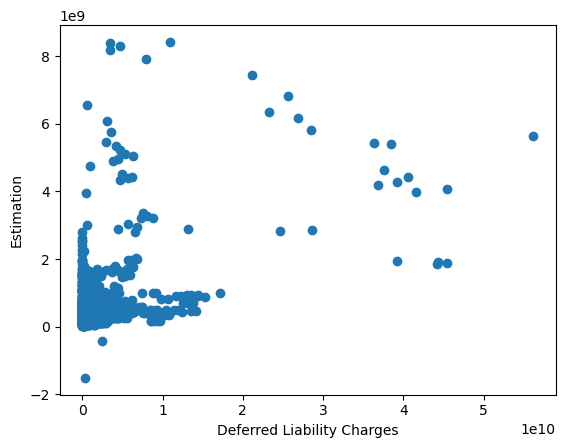

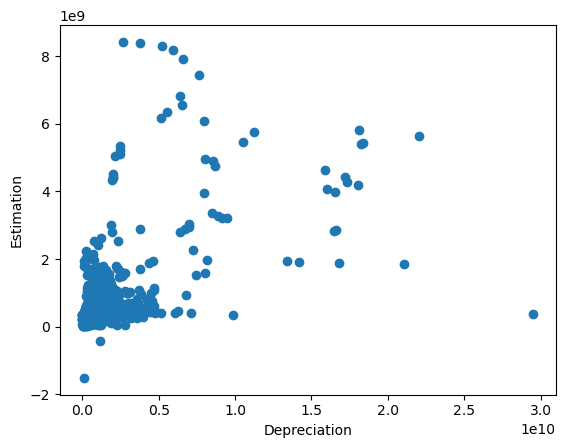

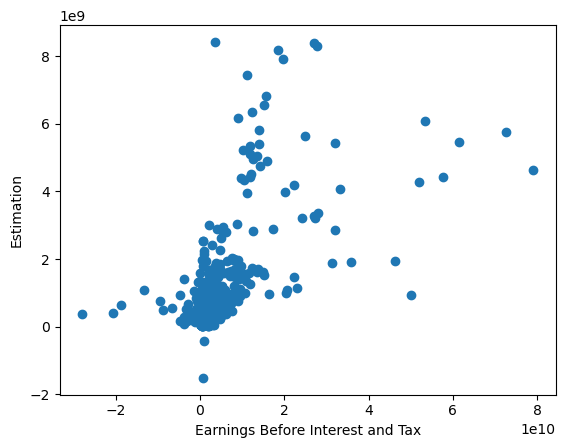

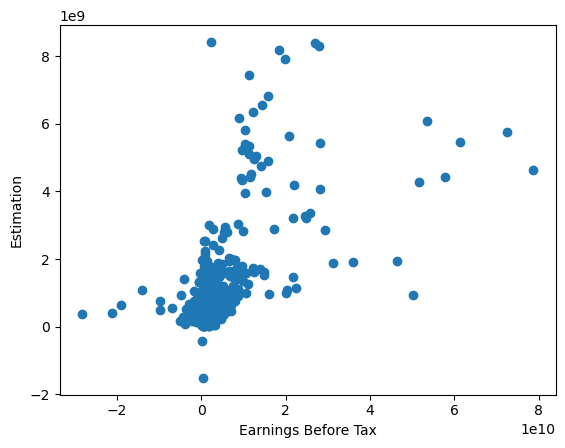

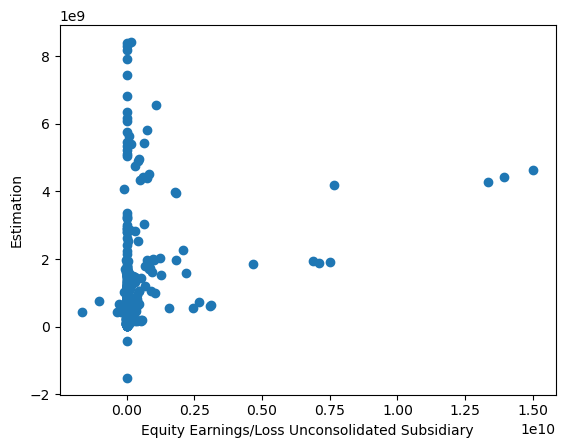

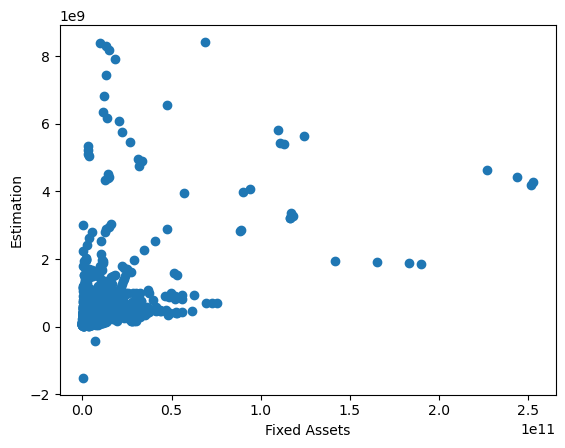

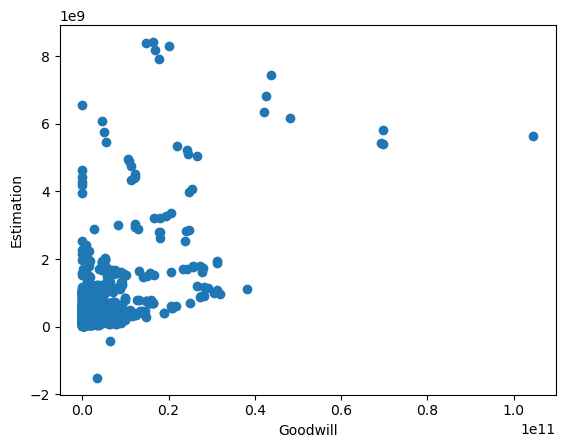

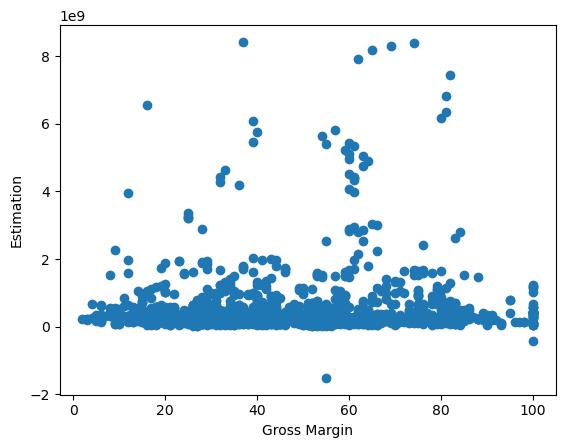

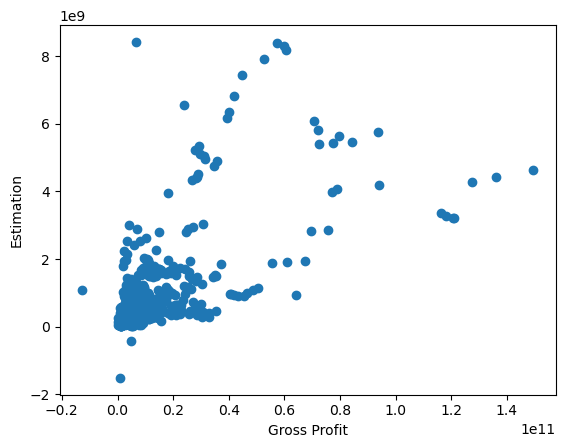

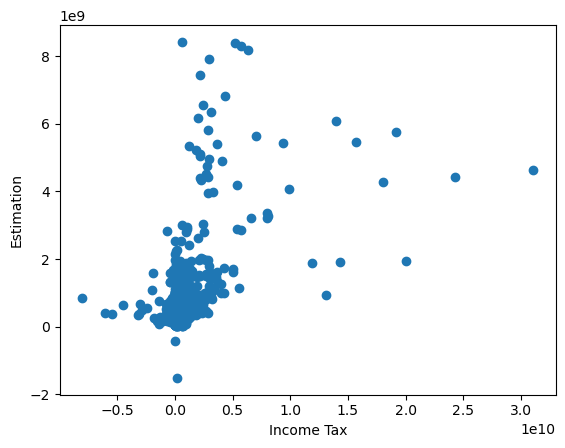

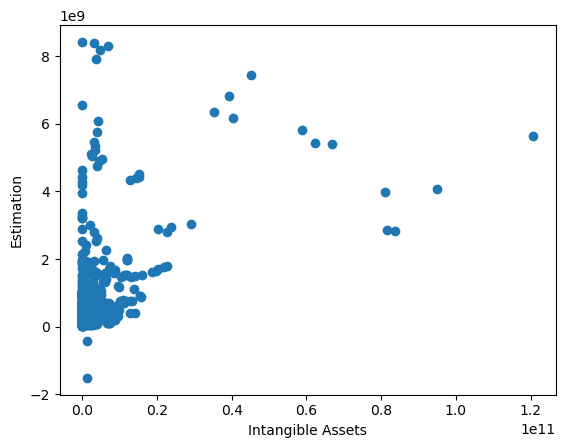

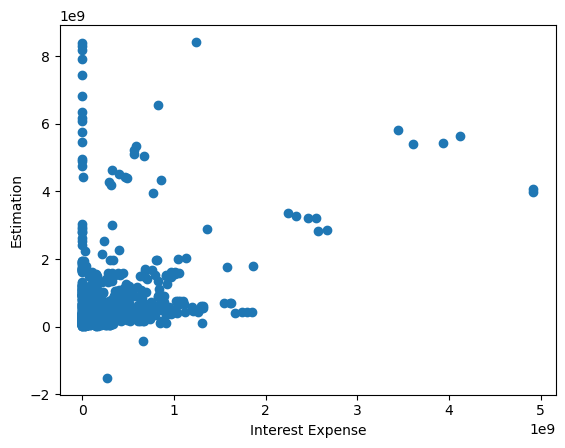

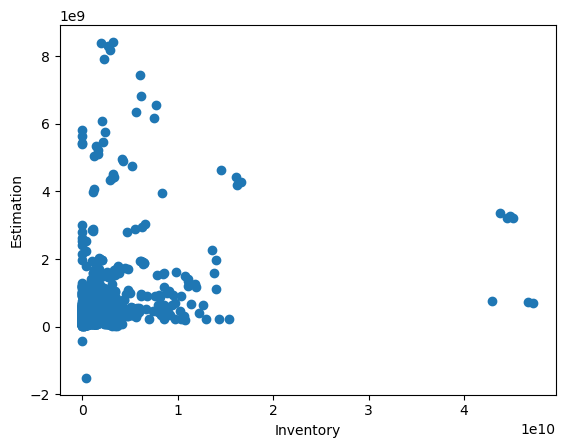

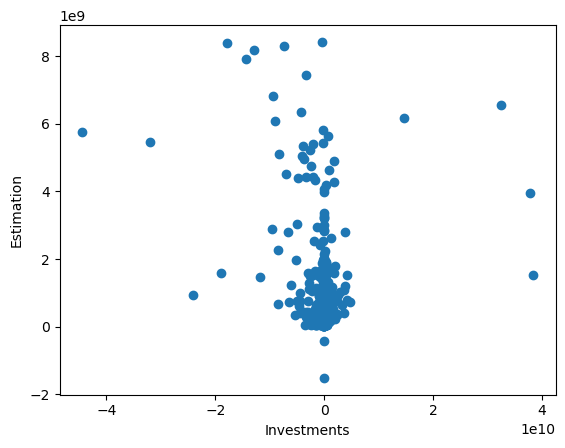

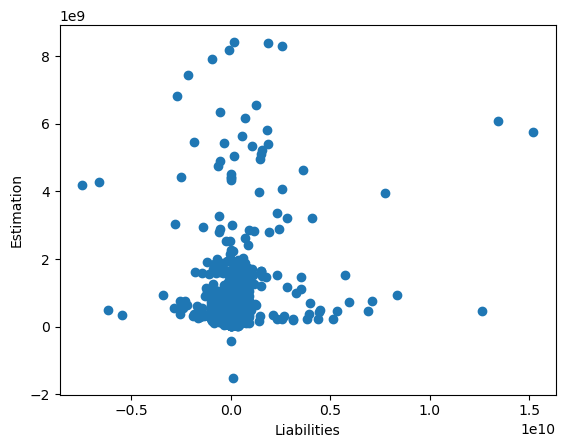

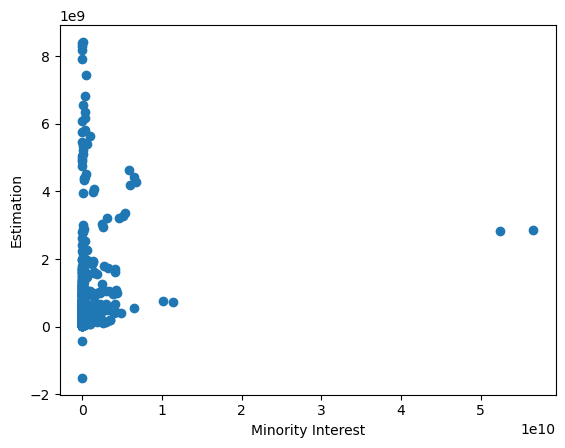

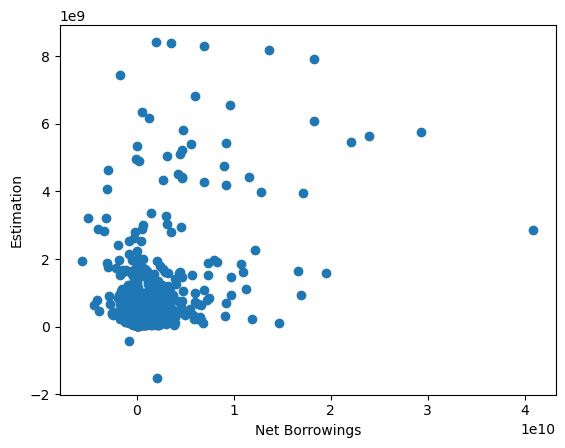

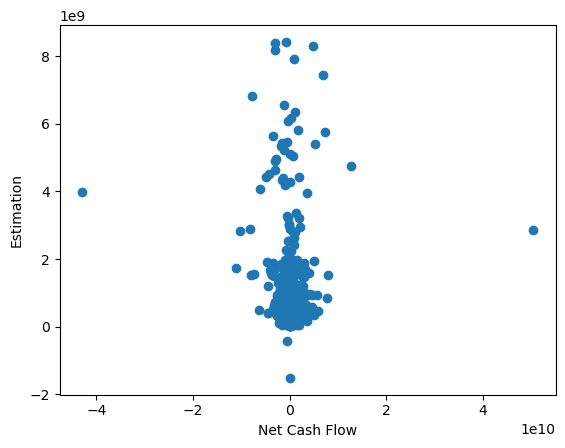

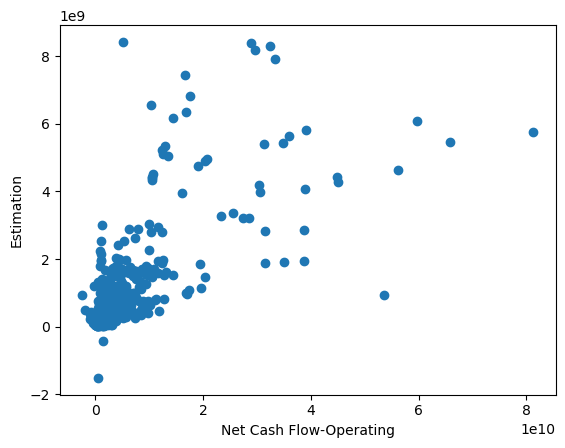

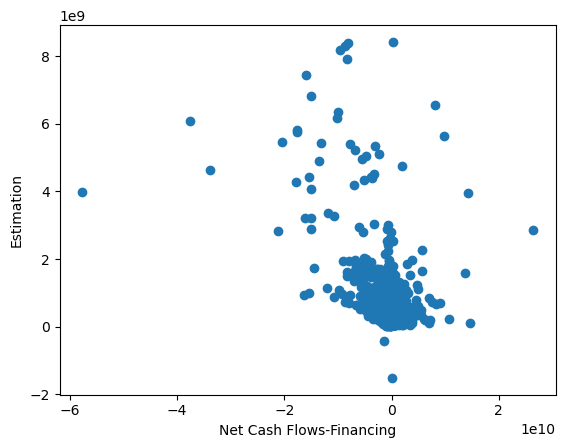

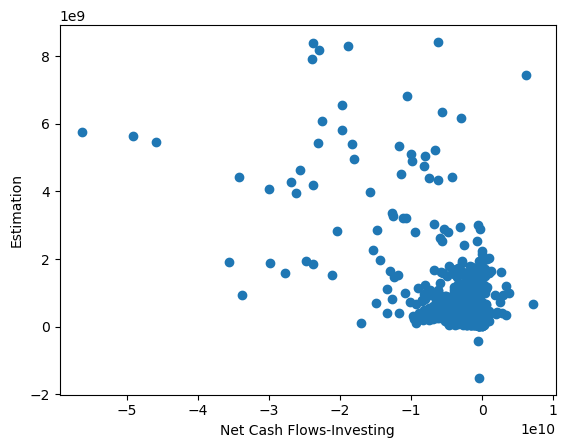

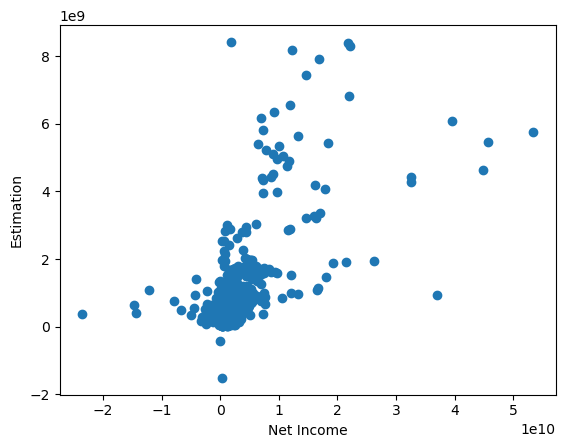

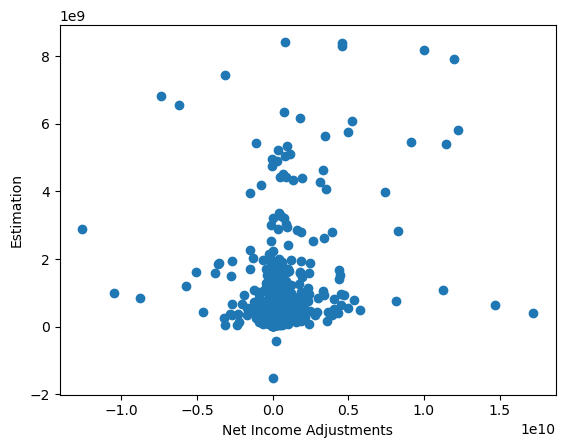

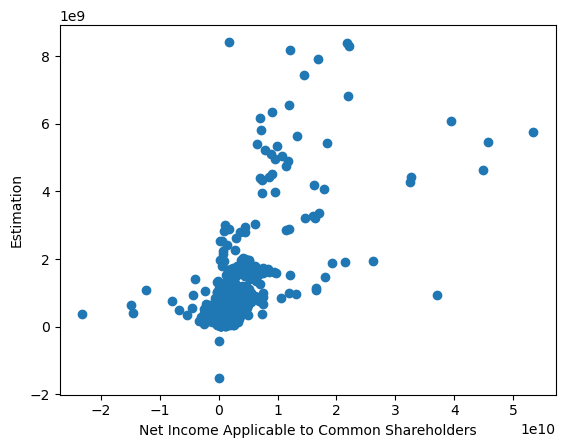

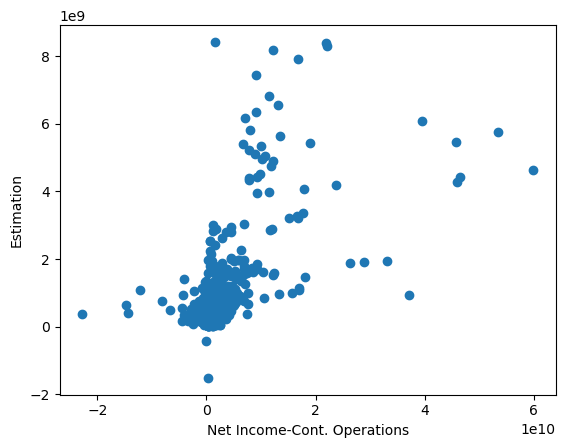

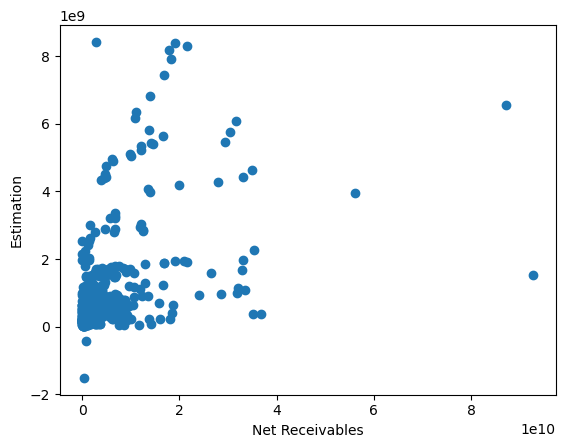

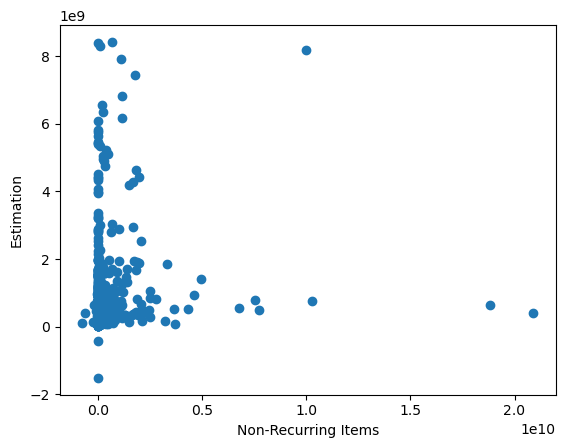

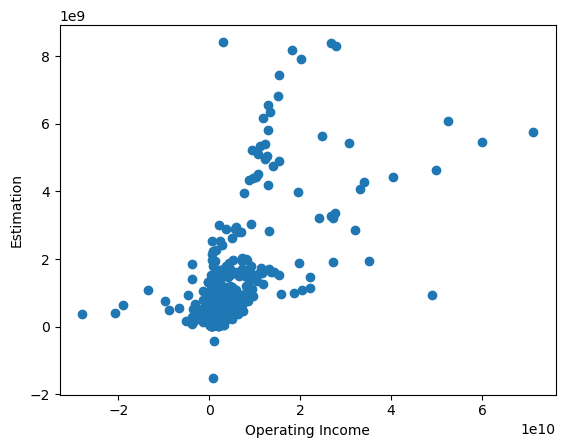

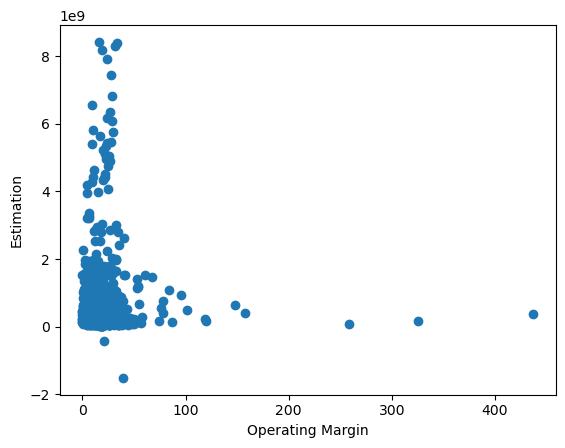

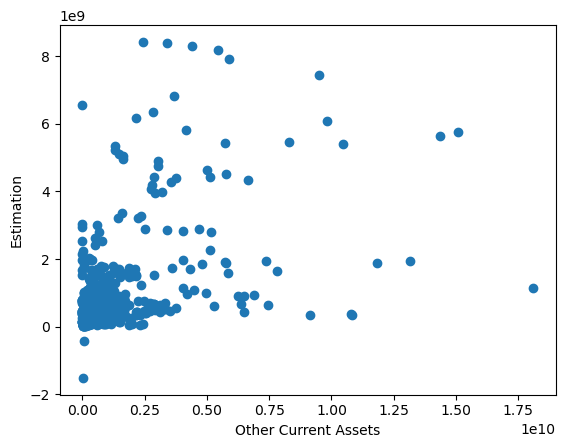

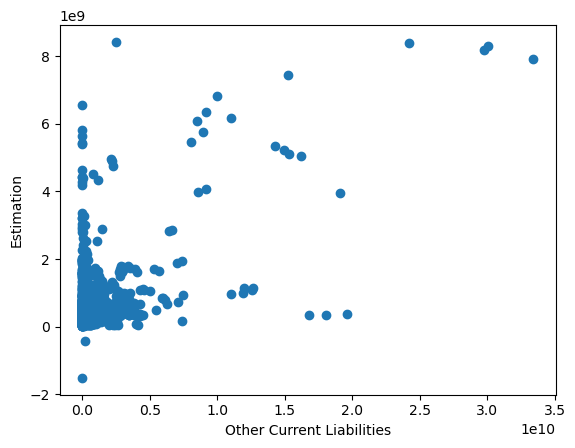

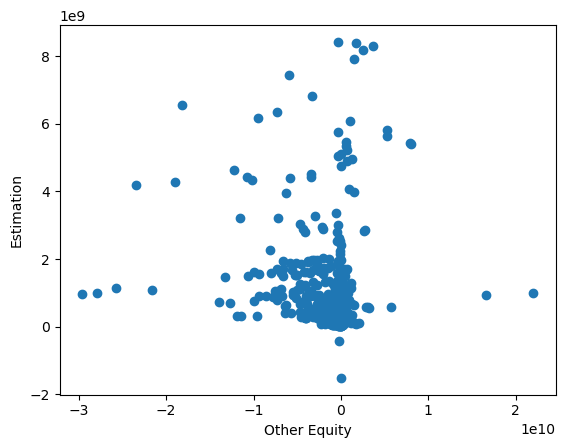

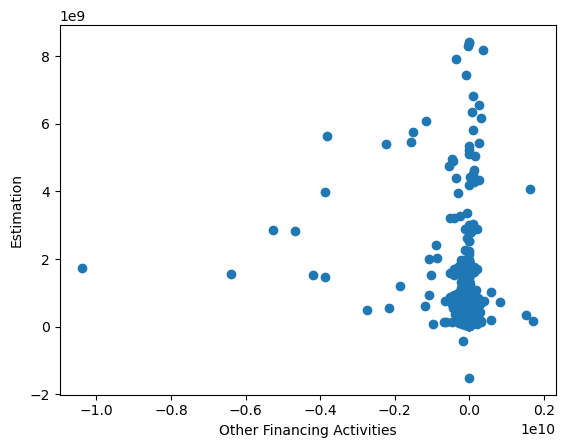

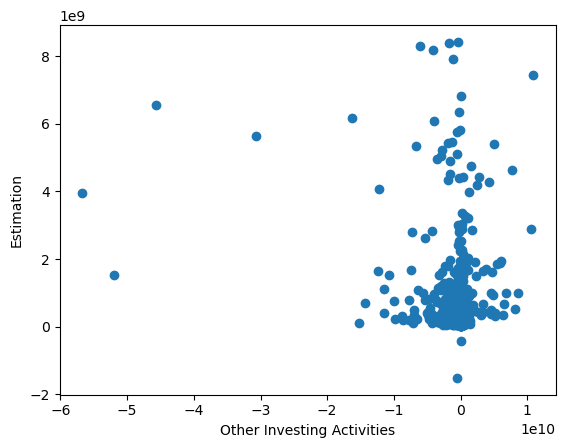

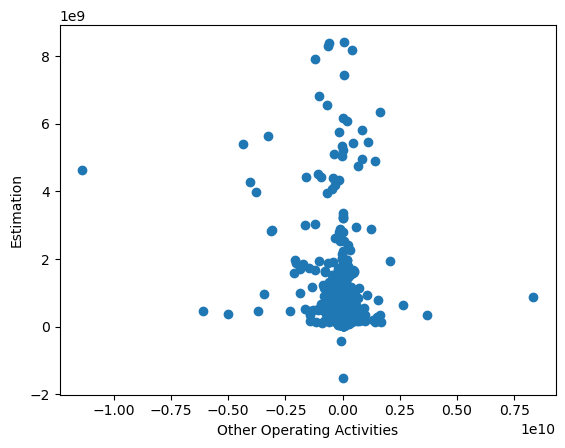

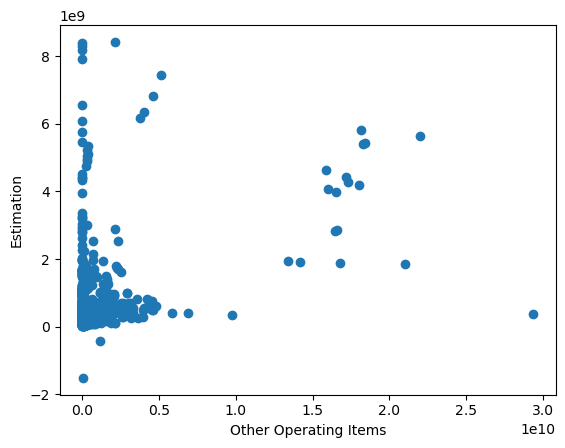

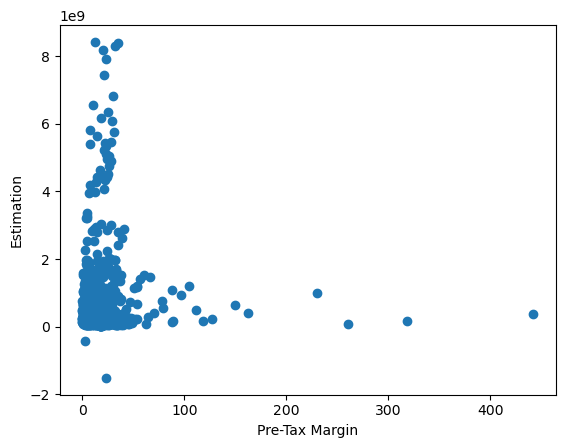

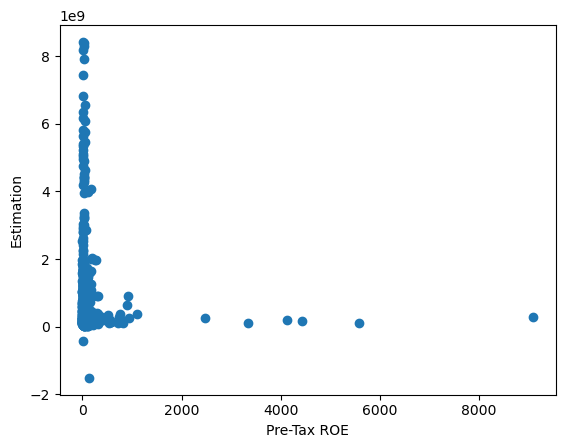

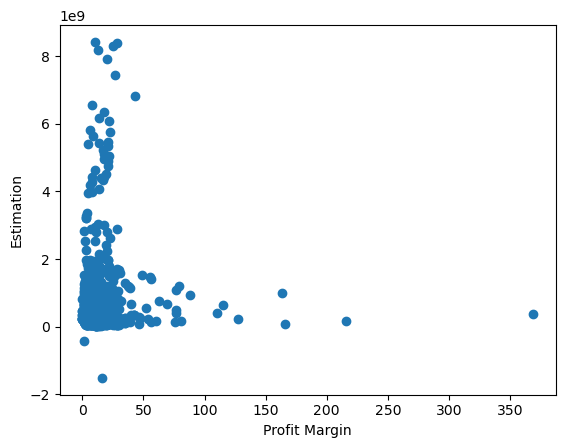

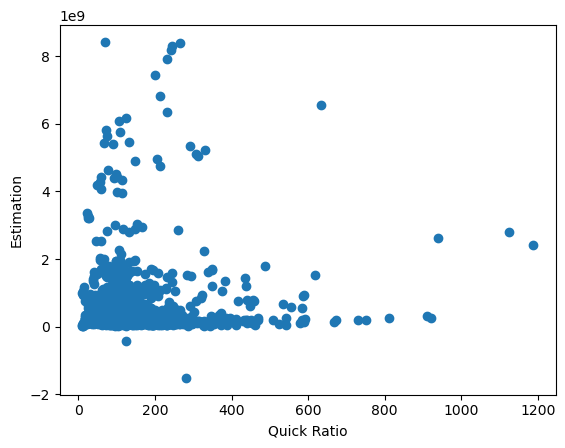

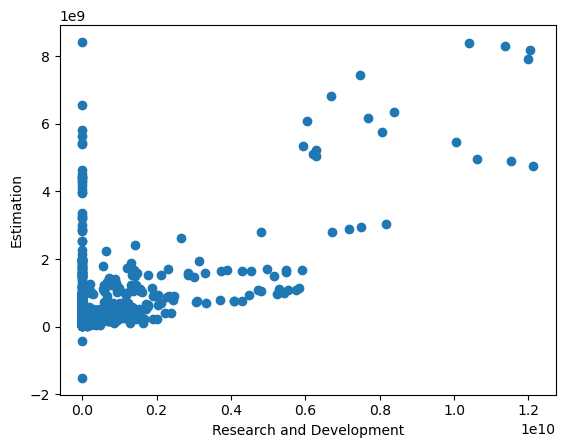

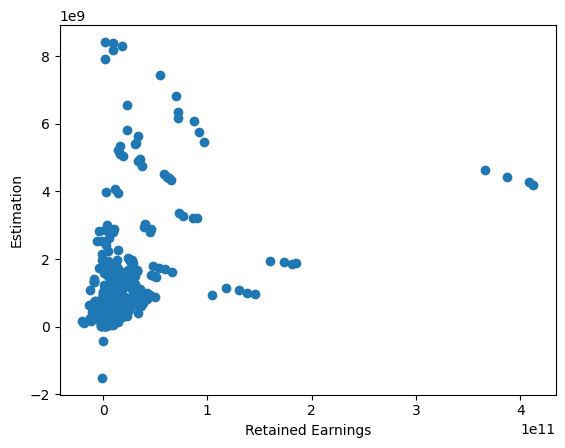

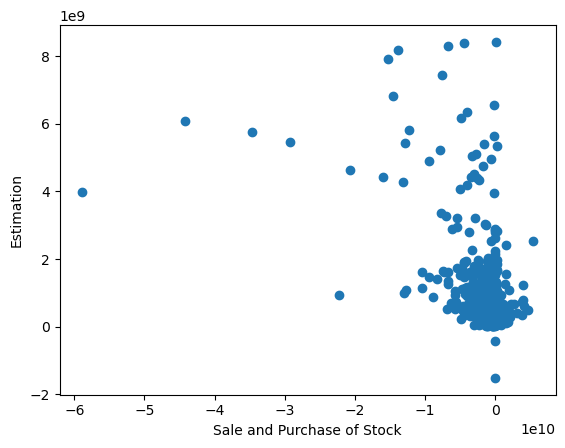

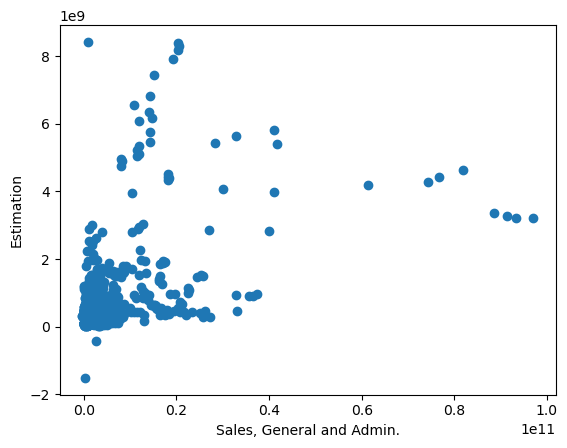

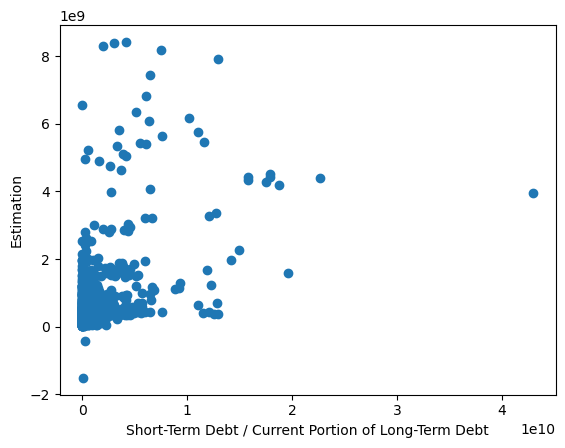

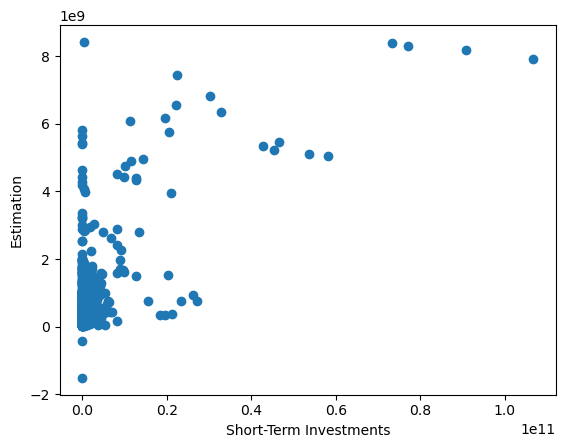

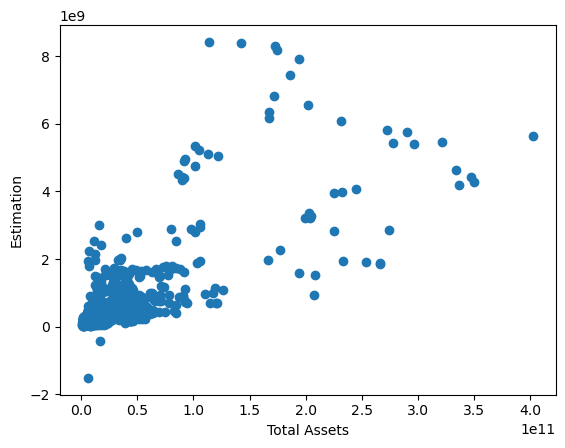

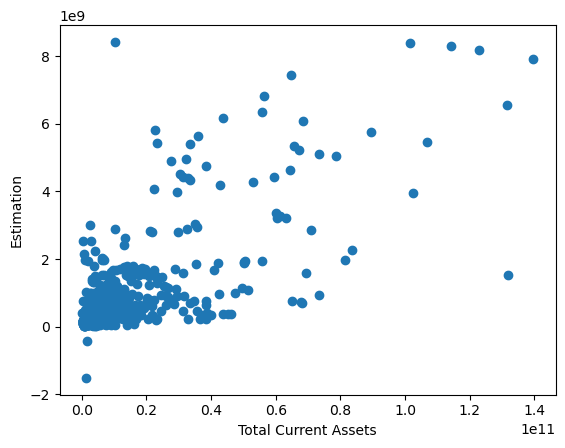

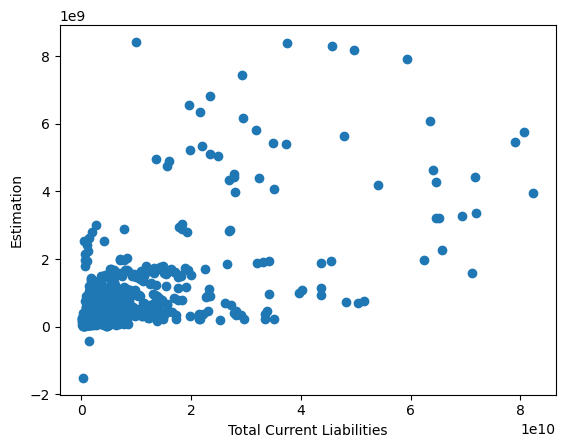

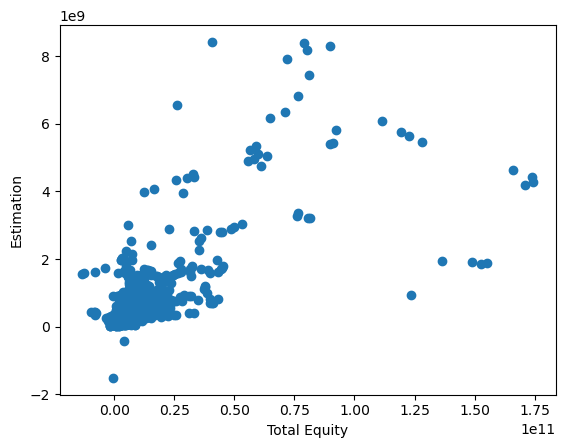

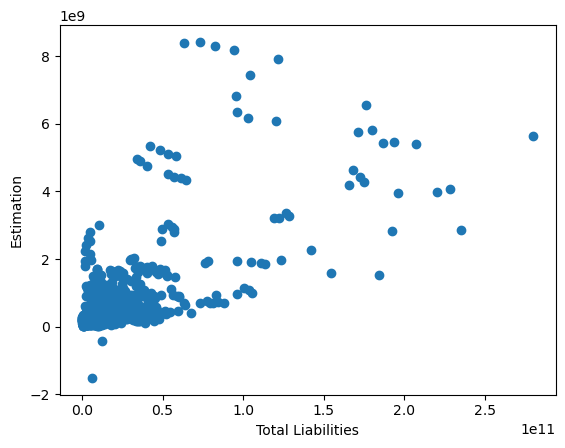

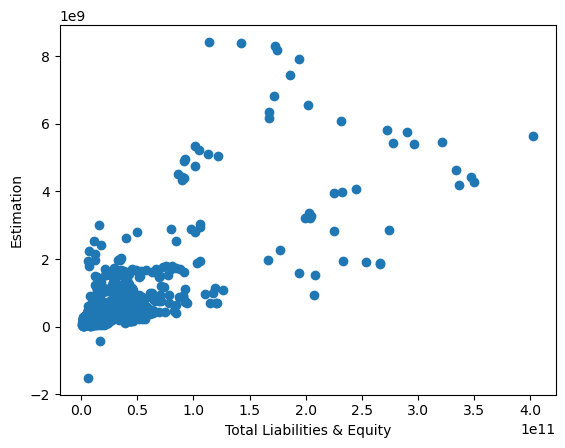

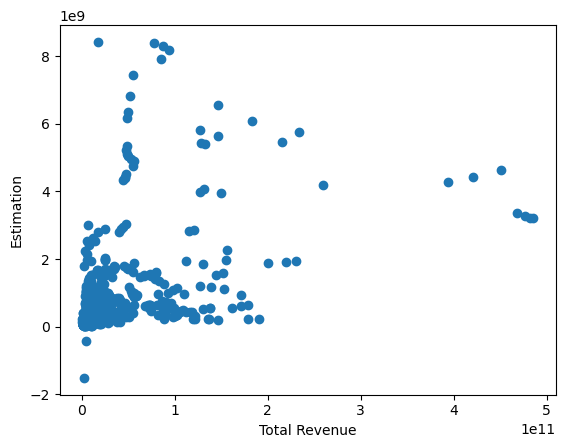

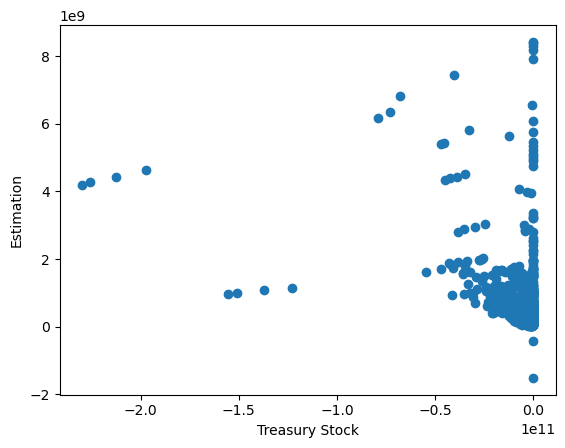

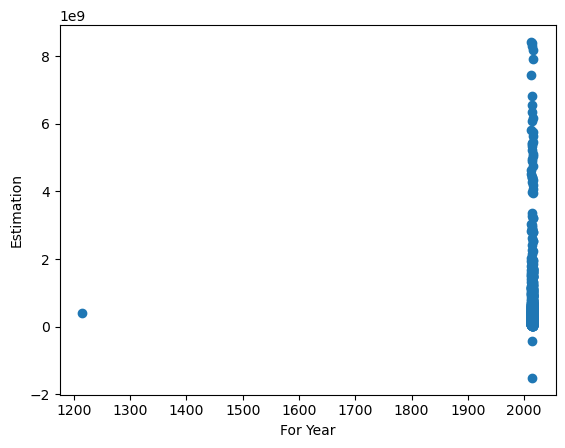

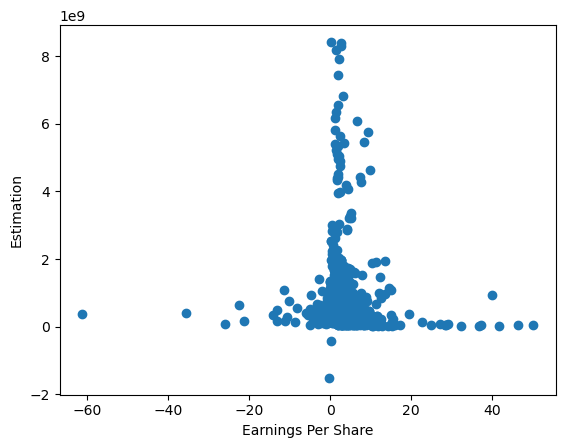

In [65]:
for feature in X.columns:
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel("Estimation")
    plt.show()

In [60]:
print(corr1.sort_values(ascending = False))

Total Liabilities & Equity    0.756288
Total Assets                  0.756219
Total Current Assets          0.738505
Net Cash Flow-Operating       0.731004
Total Equity                  0.719912
                                ...   
Treasury Stock               -0.368586
Net Cash Flows-Financing     -0.483550
Capital Expenditures         -0.487570
Sale and Purchase of Stock   -0.512954
Net Cash Flows-Investing     -0.620207
Length: 75, dtype: float64


NOTE - WE NEED TO FEATURE SCALE THE DATASET

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sc = sc.fit_transform(X)

In [49]:
X_sc

array([[-0.0860349 , -0.27978503, -2.70353304, ...,  0.25118677,
        -0.05496392, -1.77876747],
       [ 0.16958714, -0.03649651, -3.70872127, ...,  0.27404868,
        -0.00988934, -2.90546287],
       [ 0.12843561, -0.16285567, -0.31456206, ...,  0.27404868,
         0.03518524,  0.13960593],
       ...,
       [-0.31216724, -0.04781225, -0.10481806, ...,  0.27404868,
        -0.00988934, -0.46063356],
       [-0.3537209 ,  0.26902862, -0.12592438, ...,  0.27404868,
         0.03518524, -0.4307213 ],
       [-0.32128224,  0.02951201, -0.22354108, ...,  0.26140299,
         0.08025982, -0.52644055]])

In [50]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1039
260
1039
260


### Models
1. LR 
2. KNN
3. DT
4. RF
5. XGB
6. ADA
7. SVR

In [54]:
# Linear Regression 
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr)

-209.89363269422913

In [67]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 15.2 MB/s eta 0:00:00


In [70]:
# Importing all of the learning algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [85]:
# Fitting all of the learning algorithms 
# ...
# Initializing the models
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators = 50, max_depth = 30, random_state = 42)
xgb = XGBRegressor()
ada = AdaBoostRegressor()
svr = SVR()

# Fitting the model
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
ada.fit(X_train, y_train)
svr.fit(X_train, y_train)

SVR()

In [88]:
# Prediction 
# Predicting on the test set
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
ada_pred = ada.predict(X_test)
svr_pred = svr.predict(X_test)

In [87]:
# Computing the R2 scores
lr_r2 = r2_score(y_test, y_pred_lr)
knn_r2 = r2_score(y_test, knn_pred)
dt_r2 = r2_score(y_test, dt_pred)
rf_r2 = r2_score(y_test, rf_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
ada_r2 = r2_score(y_test, ada_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("KNN R2 score:", knn_r2)
print("Decision tree R2 score:", dt_r2)
print("Random forest R2 score:", rf_r2)
print("XGBoost R2 score:", xgb_r2)
print("AdaBoost R2 score:", ada_r2)
print("SVR R2 score:", svr_r2)
print("Linear Regression R2 score", lr_r2)

KNN R2 score: 0.8346895226741704
Decision tree R2 score: 0.8609210552326643
Random forest R2 score: 0.9283968449571374
XGBoost R2 score: 0.9253415499518594
AdaBoost R2 score: 0.7780930848683415
SVR R2 score: -0.0678407083290431
Linear Regression R2 score -209.89363269422913
